# Commodity Portfolio

## Commodity is raw material or primary agricultural product that can be bought and sold, such as copper or coffee.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from tabulate import tabulate
from scipy.stats import norm
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['ARLP','MPC','GOLD','BHP']
start = '2012-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  4 of 4 downloaded


,ARLP,BHP,GOLD,MPC
Date,,,,
2012-01-03,18.545843,51.582966,42.415550,12.555681
2012-01-04,19.356390,51.603657,43.049412,12.687211
2012-01-05,19.883854,50.630791,42.870869,11.995728
2012-01-06,19.888695,49.989105,42.442329,11.898020
2012-01-09,19.545115,50.168499,42.594097,11.634952


In [3]:
df.tail()

,ARLP,BHP,GOLD,MPC
Date,,,,
2018-12-24,15.314299,42.069092,13.496727,52.730476
2018-12-26,15.665341,43.952785,13.506620,56.642548
2018-12-27,15.165105,43.634289,13.635920,57.370602
2018-12-28,15.516149,43.606987,13.049107,56.535770
2018-12-31,15.217760,43.943687,13.466837,57.283234


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
7 years


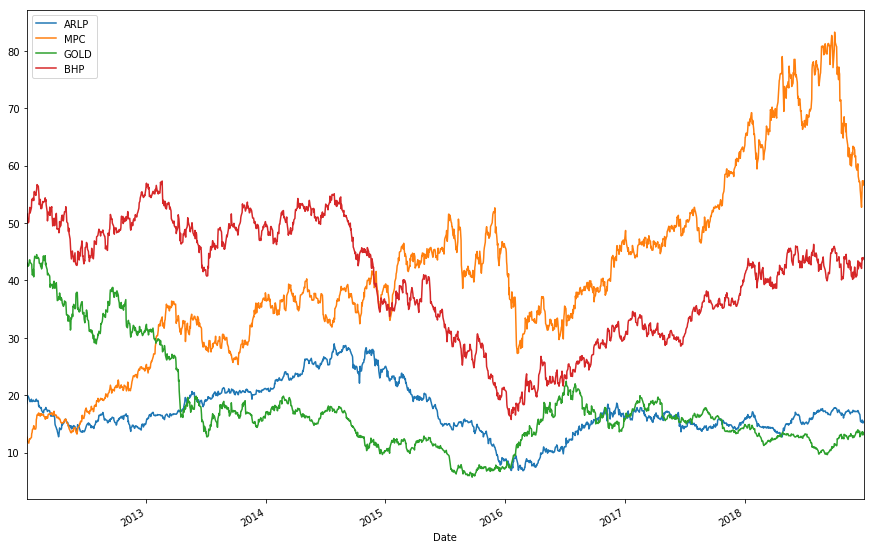

In [5]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.legend()

In [6]:
for s in symbols:
    print(s + ":",  df[s].max())

ARLP: 28.93988
MPC: 83.25367
GOLD: 44.486782
BHP: 57.307228


In [7]:
for s in symbols:
    print(s + ":",  df[s].min())

ARLP: 6.822119
MPC: 11.634952
GOLD: 5.700737999999999
BHP: 15.747570000000001


In [8]:
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = (np.log(1 + df[s].pct_change())).dropna()
    
returns.head(4)

,ARLP Return,MPC Return,GOLD Return,BHP Return
Date,,,,
2012-01-04,0.042777,0.010421,0.014834,0.000401
2012-01-05,0.026885,-0.056044,-0.004156,-0.019033
2012-01-06,0.000243,-0.008179,-0.010046,-0.012755
2012-01-09,-0.017426,-0.022358,0.003569,0.003582


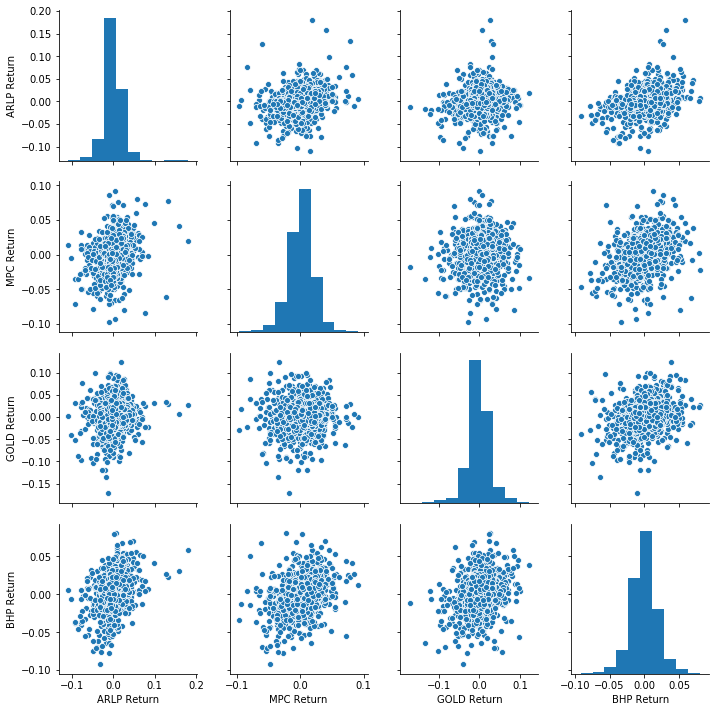

In [9]:
sns.pairplot(returns[1:])

In [10]:
# dates each bank stock had the best and worst single day returns. 
print('Best Day Returns')
print('-'*20)
print(returns.idxmax())
print('\n')
print('Worst Day Returns')
print('-'*20)
print(returns.idxmin())

Best Day Returns
--------------------
ARLP Return   2016-01-26
MPC Return    2012-02-01
GOLD Return   2016-06-03
BHP Return    2016-01-21
dtype: datetime64[ns]


Worst Day Returns
--------------------
ARLP Return   2017-06-16
MPC Return    2015-08-21
GOLD Return   2015-07-20
BHP Return    2016-03-08
dtype: datetime64[ns]


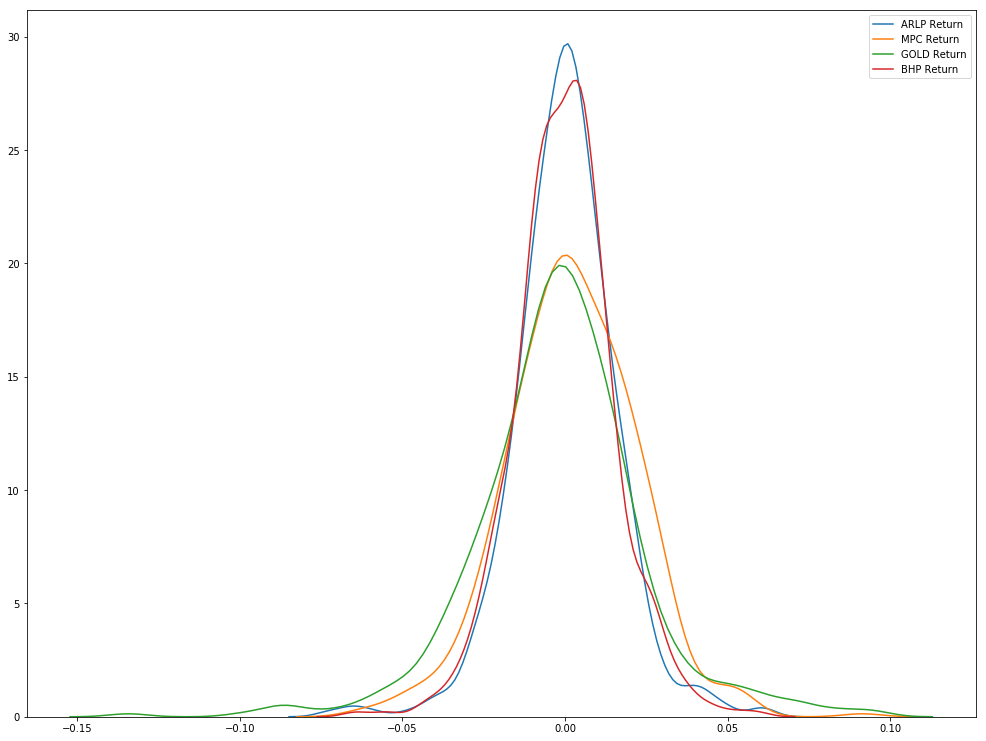

In [11]:
plt.figure(figsize=(17,13))

for r in returns:
    sns.kdeplot(returns.ix["2012-01-01" : "2013-12-31 "][r])

In [12]:
returns.corr()

,ARLP Return,MPC Return,GOLD Return,BHP Return
ARLP Return,1.000000,0.225818,0.122109,0.356251
MPC Return,0.225818,1.000000,0.091037,0.357620
GOLD Return,0.122109,0.091037,1.000000,0.299729
BHP Return,0.356251,0.357620,0.299729,1.000000


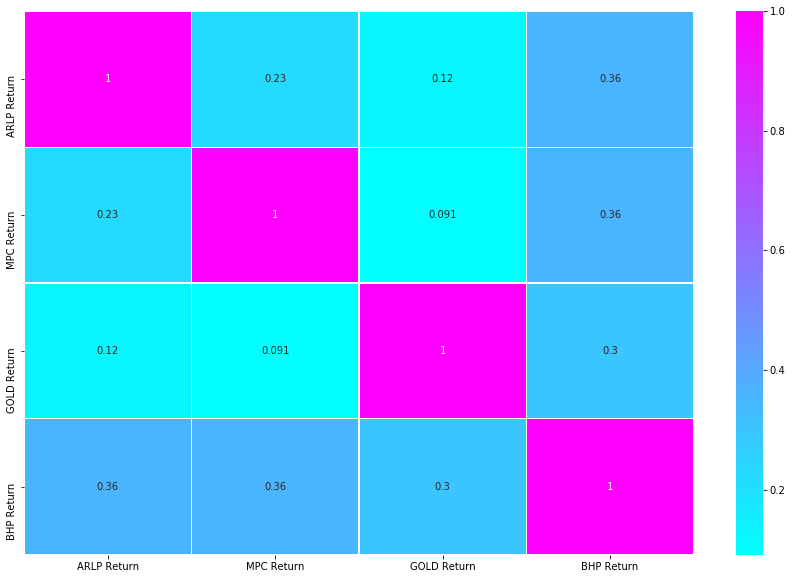

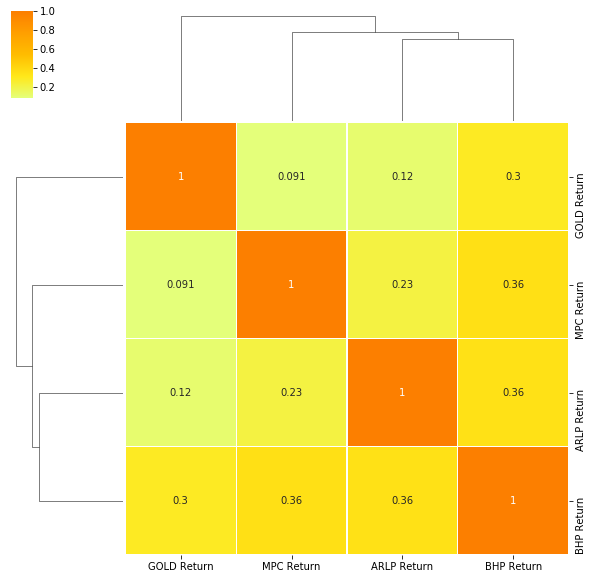

In [13]:
# Heatmap for return of all the banks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="cool",linewidths=.1, annot= True)

sns.clustermap(returns.corr(), cmap="Wistia",linewidths=.1, annot= True)

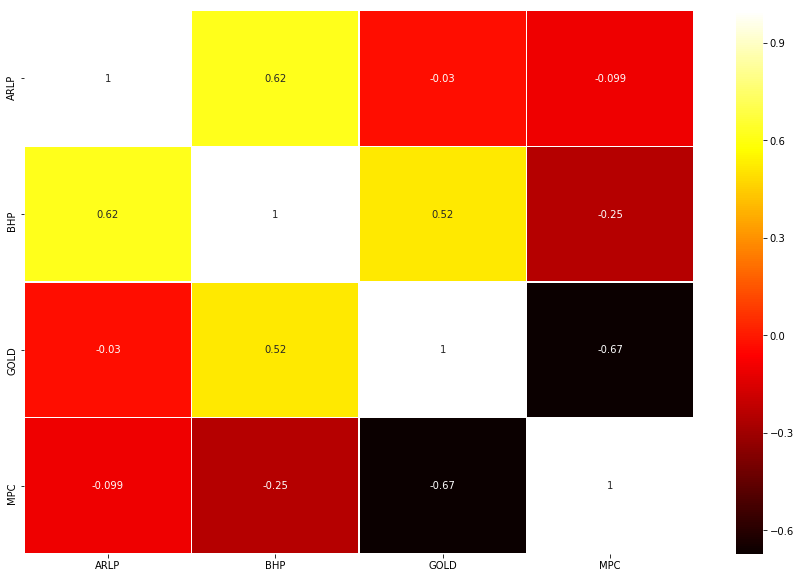

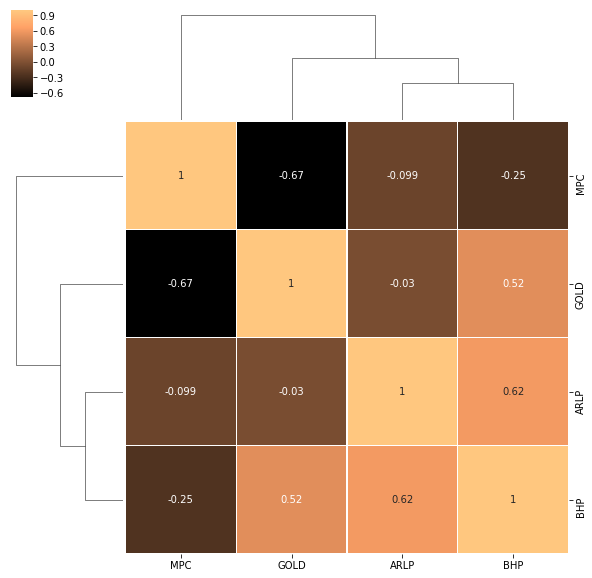

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="hot",linewidths=.1, annot= True)

sns.clustermap(df.corr(), cmap="copper",linewidths=.1, annot= True)

In [15]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
ARLP: 25000.0
BHP: 25000.0
GOLD: 25000.0
MPC: 25000.0


In [16]:
print('Number of Shares:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
ARLP: 1348
BHP: 484
GOLD: 589
MPC: 1991


In [17]:
print('Beginning Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
ARLP: $24999.8
BHP: $24966.16
GOLD: $24982.76
MPC: $24998.36


In [18]:
print('Current Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
ARLP: $20513.54
BHP: $21268.74
GOLD: $7931.97
MPC: $114050.92


In [19]:
result = []
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $163765.17


In [20]:
# Calculate Daily Returns
returns = df.pct_change()
returns = returns.dropna()

In [21]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

ARLP    0.000125
BHP     0.000093
GOLD   -0.000290
MPC     0.001070
dtype: float64


In [22]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

ARLP    0.021900
BHP     0.019195
GOLD    0.026890
MPC     0.020326
dtype: float64


In [23]:
# Define weights for the portfolio
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [24]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

          ARLP       BHP      GOLD       MPC
ARLP  0.119897  0.037452  0.017702  0.025148
BHP   0.037452  0.092108  0.038577  0.034777
GOLD  0.017702  0.038577  0.180765  0.012091
MPC   0.025148  0.034777  0.012091  0.103290


In [25]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [26]:
# Print the portfolio return
print(portReturn)

0.0002495645004287287


In [27]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [28]:
returns.head()

,ARLP,BHP,GOLD,MPC,Portfolio
Date,,,,,
2012-01-04,0.043705,0.000401,0.014944,0.010476,0.017382
2012-01-05,0.027250,-0.018853,-0.004147,-0.054502,-0.012563
2012-01-06,0.000243,-0.012674,-0.009996,-0.008145,-0.007643
2012-01-09,-0.017275,0.003589,0.003576,-0.022110,-0.008055
2012-01-10,-0.012131,0.027644,0.012996,0.028101,0.014152


In [29]:
returns.tail()

,ARLP,BHP,GOLD,MPC,Portfolio
Date,,,,,
2018-12-24,-0.005698,-0.018471,0.039634,-0.042651,-0.006796
2018-12-26,0.022922,0.044776,0.000733,0.074190,0.035655
2018-12-27,-0.031933,-0.007246,0.009573,0.012853,-0.004188
2018-12-28,0.023148,-0.000626,-0.043034,-0.014552,-0.008766
2018-12-31,-0.019231,0.007721,0.032012,0.013221,0.008431


In [30]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                ARLP       BHP      GOLD       MPC  Portfolio
Date                                                         
2018-12-24  0.825754  0.815562  0.318202  4.199730   1.254303
2018-12-26  0.844682  0.852079  0.318436  4.511308   1.299026
2018-12-27  0.817709  0.845905  0.321484  4.569294   1.293586
2018-12-28  0.836638  0.845376  0.307649  4.502804   1.282246
2018-12-31  0.820548  0.851903  0.317498  4.562336   1.293057


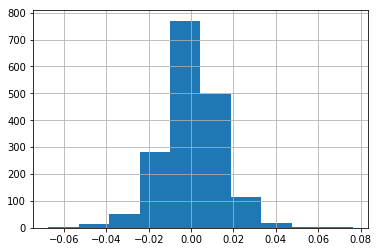

In [31]:
returns['Portfolio'].hist()
plt.show()

In [32]:
# 99% confidence interval
# 0.01 empirical quantile of daily returns
var99 = round((returns['Portfolio']).quantile(0.01), 3)

In [33]:
print('Value at Risk (99% confidence)')
print(var99)

Value at Risk (99% confidence)
-0.038


In [34]:
# the percent value of the 5th quantile
print('Percent Value-at-Risk of the 5th quantile')
var_1_perc = round(np.quantile(var99, 0.01), 3)
print("{:.1f}%".format(-var_1_perc*100))

Percent Value-at-Risk of the 5th quantile
3.8%


In [35]:
print('Value-at-Risk of 99% for 100,000 investment')
print("${}".format(-var99 * 100000))

Value-at-Risk of 99% for 100,000 investment
$3800.0


In [36]:
# 95% confidence interval
# 0.05 empirical quantile of daily returns
var95 = round((returns['Portfolio']).quantile(0.05), 3)

In [37]:
print('Value at Risk (95% confidence)')
print(var95)

Value at Risk (95% confidence)
-0.022


In [38]:
print('Percent Value-at-Risk of the 5th quantile')
print("{:.1f}%".format(-var95*100))

Percent Value-at-Risk of the 5th quantile
2.2%


In [39]:
# VaR for 100,000 investment
print('Value-at-Risk of 99% for 100,000 investment')
var_100k = "${}".format(int(-var95 * 100000))
print("${}".format(int(-var95 * 100000)))

Value-at-Risk of 99% for 100,000 investment
$2200


In [40]:
mean = np.mean(returns['Portfolio'])
std_dev = np.std(returns['Portfolio'])

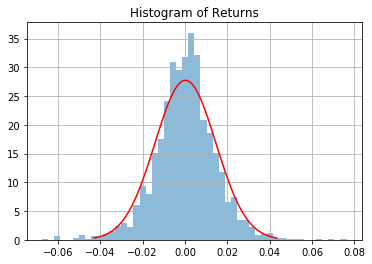

In [41]:
returns['Portfolio'].hist(bins=50, normed=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, mlab.normpdf(x, mean, std_dev), "r")
plt.title('Histogram of Returns')
plt.show()

In [42]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [43]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0181786
95%                      -0.0234027
99%                      -0.0332022


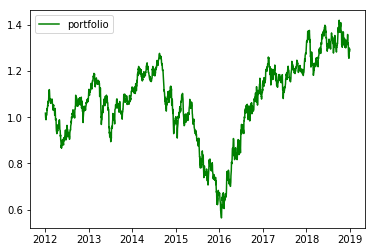

In [44]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='green', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [45]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  0.0249564500428729
Std. dev:  1.43836274854672
skew:  -0.0329968419034671
kurt:  2.244962879713683


In [46]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

22.74%


In [47]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

5.17%


In [48]:
# Calculate total return and annualized return from price data 
total_return = returns['Portfolio'][-1] - returns['Portfolio'][0]
                
# Annualize the total return over 5 year 
annualized_return = ((1+total_return)**(1/7))-1

In [49]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [50]:
# Calculate the Sharpe ratio 
rf = 0.001
sharpe_ratio = (annualized_return - rf) / vol_port
print(sharpe_ratio)

-0.010041059879162777


In [51]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.0249564500428729
--------------------------------------------------
Downside risk:
ARLP         1.873894
BHP          1.580285
GOLD         2.374853
MPC          1.756525
Portfolio    0.971359
dtype: float64
--------------------------------------------------
Sortino ratio:
ARLP        -0.520330
BHP         -0.617005
GOLD        -0.410570
MPC         -0.555098
Portfolio   -1.003794
dtype: float64


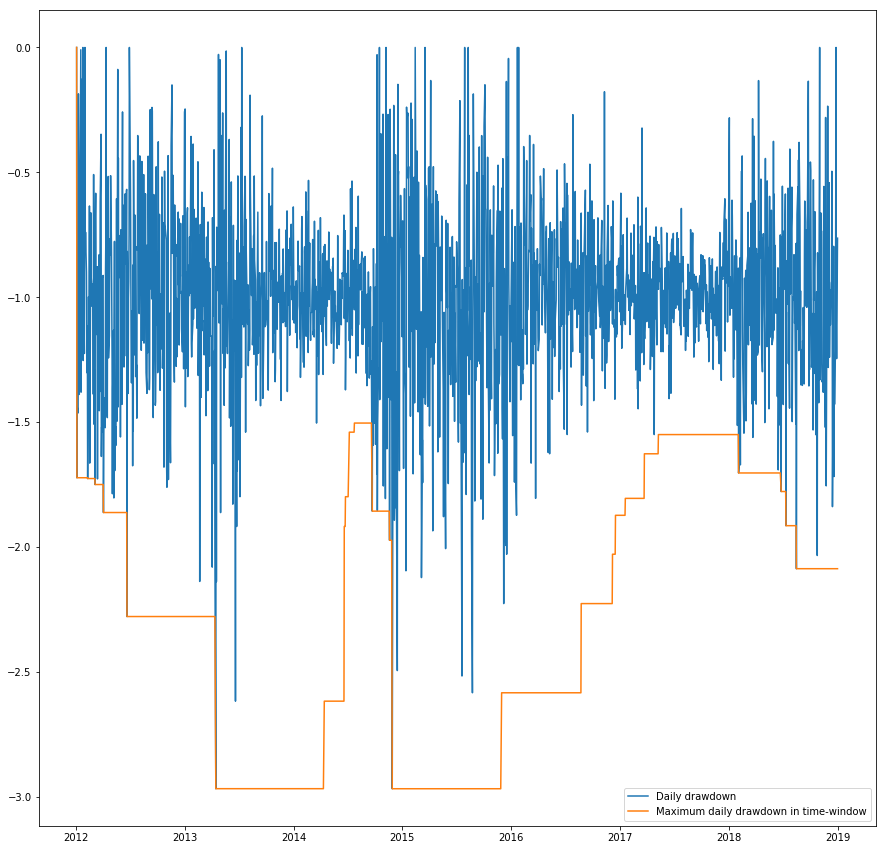

In [52]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

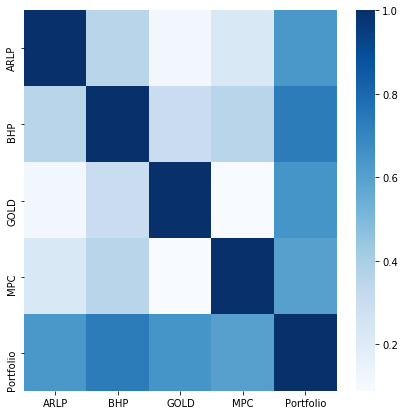

In [53]:
plt.figure(figsize=(7,7))
corr = returns.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

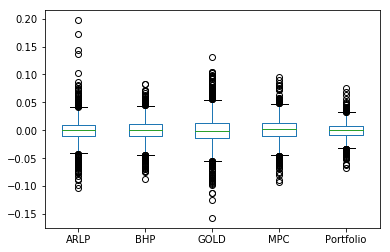

In [54]:
# Box plot
returns.plot(kind='box')

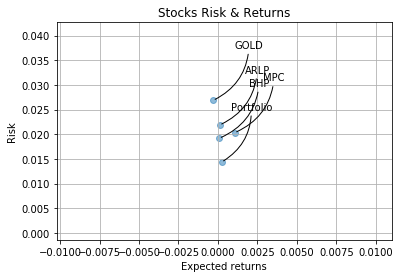

In [55]:
rets = returns.dropna()

plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

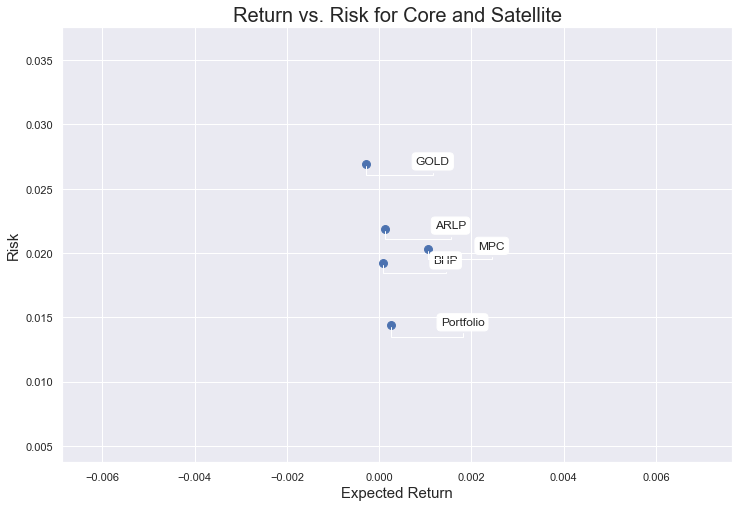

In [56]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Core and Satellite", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [57]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
GOLD,-0.000290,0.026890
BHP,0.000093,0.019195
ARLP,0.000125,0.021900
Portfolio,0.000250,0.014384
MPC,0.001070,0.020326


In [58]:
table.sort_values(by='Risk')

,Returns,Risk
Portfolio,0.000250,0.014384
BHP,0.000093,0.019195
MPC,0.001070,0.020326
ARLP,0.000125,0.021900
GOLD,-0.000290,0.026890


In [59]:
rf = 0.001
table['Sharpe_Ratio'] = ((table['Returns'] - rf) / table['Risk']) * np.sqrt(252)
table

,Returns,Risk,Sharpe_Ratio
ARLP,0.000125,0.021900,-0.634288
BHP,0.000093,0.019195,-0.749947
GOLD,-0.000290,0.026890,-0.761460
MPC,0.001070,0.020326,0.054600
Portfolio,0.000250,0.014384,-0.828219
